In [10]:
%reload_ext mocodo

In [11]:
from IPython import display
from pathlib import Path

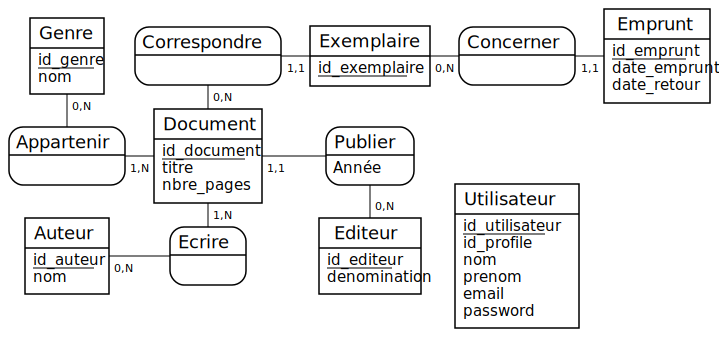

In [12]:
%%mocodo --mld --shapes copperplate --relations diagram  --relations mysql --title gestion_bu
Genre: id_genre [int(11)], nom [varchar(50)]
Correspondre, 0N Document, 11 Exemplaire
Exemplaire: id_exemplaire [int(11)]
Concerner, 11 Emprunt, 0N Exemplaire
Emprunt:id_emprunt [int(11)], date_emprunt [date], date_retour [date]

Appartenir, 1N Document, 0N Genre
Document: id_document [int(11)], titre [varchar(50)], nbre_pages [smallint]
Publier, 11 Document, 0N Editeur: Année [date]
:
:

Auteur: id_auteur [int(11)], nom [varchar(50)]
Ecrire, 0N Auteur, 1N Document
Editeur: id_editeur [int(11)], denomination [varchar(50)]
Utilisateur: id_utilisateur [int(11)], id_profile [int(11)], nom [varchar(255)], prenom [varchar (255)], email [varchar (255)], password [varchar (255)]
:


In [13]:
display.Code(filename="mocodo_notebook/sandbox_mysql.sql", language="mysql")

CREATE DATABASE IF NOT EXISTS `GESTION_BU` DEFAULT CHARACTER SET UTF8MB4 COLLATE utf8_general_ci;
USE `GESTION_BU`;

CREATE TABLE `APPARTENIR` (
  `id_document` int(11),
  `id_genre` int(11),
  PRIMARY KEY (`id_document`, `id_genre`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `AUTEUR` (
  `id_auteur` int(11),
  `nom` varchar(50),
  PRIMARY KEY (`id_auteur`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `DOCUMENT` (
  `id_document` int(11),
  `titre` varchar(50),
  `nbre_pages` smallint,
  `id_editeur` int(11),
  `année` date,
  PRIMARY KEY (`id_document`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `ECRIRE` (
  `id_auteur` int(11),
  `id_document` int(11),
  PRIMARY KEY (`id_auteur`, `id_document`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `EDITEUR` (
  `id_editeur` int(11),
  `denomination` varchar(50),
  PRIMARY KEY (`id_editeur`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `EMPRUNT` (
  `id_emprunt` int(11),
  `date_emprunt` date,
  `date_retour` date,
  `id_exemplaire` int(11),
  PRIMARY KEY (`id_emprunt`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `EXEMPLAIRE` (
  `id_exemplaire` int(11),
  `id_document` int(11),
  PRIMARY KEY (`id_exemplaire`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `GENRE` (
  `id_genre` int(11),
  `nom` varchar(50),
  PRIMARY KEY (`id_genre`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `UTILISATEUR` (
  `id_utilisateur` int(11),
  `id_profile` int(11),
  `nom` varchar(255),
  `prenom` varchar (255),
  `email` varchar (255),
  `password` varchar (255),
  PRIMARY KEY (`id_utilisateur`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

ALTER TABLE `APPARTENIR` ADD FOREIGN KEY (`id_genre`) REFERENCES `GENRE` (`id_genre`);
ALTER TABLE `APPARTENIR` ADD FOREIGN KEY (`id_document`) REFERENCES `DOCUMENT` (`id_document`);
ALTER TABLE `DOCUMENT` ADD FOREIGN KEY (`id_editeur`) REFERENCES `EDITEUR` (`id_editeur`);
ALTER TABLE `ECRIRE` ADD FOREIGN KEY (`id_document`) REFERENCES `DOCUMENT` (`id_document`);
ALTER TABLE `ECRIRE` ADD FOREIGN KEY (`id_auteur`) REFERENCES `AUTEUR` (`id_auteur`);
ALTER TABLE `EMPRUNT` ADD FOREIGN KEY (`id_exemplaire`) REFERENCES `EXEMPLAIRE` (`id_exemplaire`);
ALTER TABLE `EXEMPLAIRE` ADD FOREIGN KEY (`id_document`) REFERENCES `DOCUMENT` (`id_document`);